In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
import statsmodels.formula.api as smf

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn

In [7]:
from hblee import st, Corrplot

ModuleNotFoundError: No module named 'hblee'

In [9]:
get_ipython().magic('matplotlib inline')

In [13]:
import sys

In [14]:
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [17]:
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [18]:
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


In [19]:
# ### 실행 환경

In [20]:
np.__version__ , pd.__version__, seaborn.__version__

('1.18.1', '1.0.1', '0.10.0')

In [21]:
# package_list = ['pandas', 'numpy', 'IPython', 'seaborn', 'sklearn', 'matplotlib', 'statsmodels']


In [22]:
# for pack in package_list:
#     statement = 'import ' + pack
#     exec(statement)
#     print ("%s : %s" % (pack, eval(pack).__version__) ) 

In [23]:
# advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


In [26]:
advertising = pd.read_csv('C:/Users/현도/Desktop/data/data_1/Advertising.csv', usecols=[1,2,3,4]) 

In [28]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
type(advertising)

pandas.core.frame.DataFrame

In [31]:
advertising.shape

(200, 4)

In [33]:
advertising.index, advertising.columns

(RangeIndex(start=0, stop=200, step=1),
 Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object'))

In [35]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [39]:
str(advertising)

'        TV  radio  newspaper  sales\n0    230.1   37.8       69.2   22.1\n1     44.5   39.3       45.1   10.4\n2     17.2   45.9       69.3    9.3\n3    151.5   41.3       58.5   18.5\n4    180.8   10.8       58.4   12.9\n..     ...    ...        ...    ...\n195   38.2    3.7       13.8    7.6\n196   94.2    4.9        8.1    9.7\n197  177.0    9.3        6.4   12.8\n198  283.6   42.0       66.2   25.5\n199  232.1    8.6        8.7   13.4\n\n[200 rows x 4 columns]'

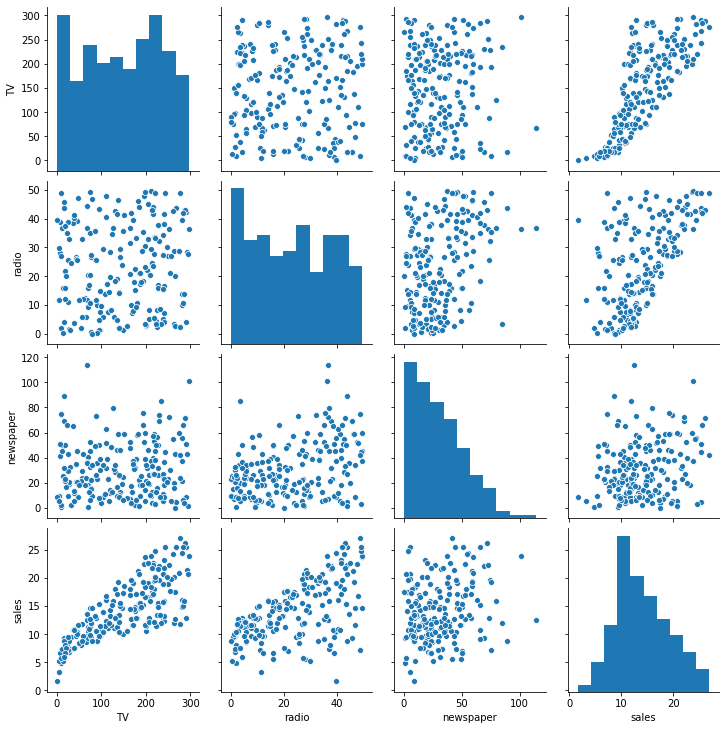

In [40]:
seaborn.pairplot(advertising)

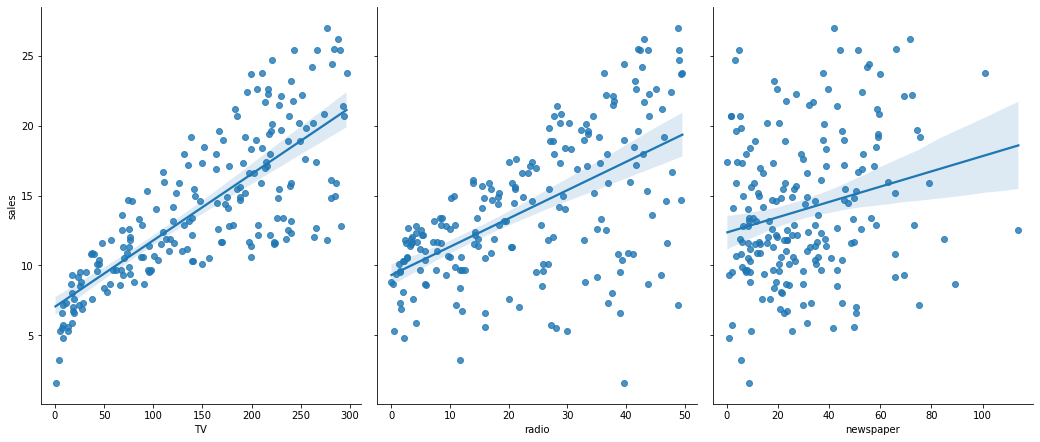

In [47]:
seaborn.pairplot(data=advertising,x_vars=['TV','radio','newspaper'],y_vars=['sales'],size=6,aspect=0.8,kind='reg')

In [48]:
Corrplot(advertising).plot(fontsize='large')

NameError: name 'Corrplot' is not defined

In [50]:
plt.show()

In [51]:
# - Sales와 TV간 강한 정비례 관계가 있다

In [54]:
######################3

In [56]:
lm=smf.ols(formula='sales~TV',data=advertising)

In [57]:
lm_learned=lm.fit()

In [58]:
lm_learned.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [61]:
lm_learned._Tab_

AttributeError: 'OLSResults' object has no attribute '_Tab_'

In [62]:
lm=smf.ols(formula='sales~TV',data=advertising)

In [64]:
lm=smf.ols(formula='sales~TV',data=advertising).fit()

In [65]:
print ("Coeffients:\n%s \n\np-values:\n%s , \n\nr-squared: %s " % (lm.params, lm.pvalues, lm.rsquared))

Coeffients:
Intercept    7.032594
TV           0.047537
dtype: float64 

p-values:
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 , 

r-squared: 0.611875050850071 


Text(0, 0.5, "sales (in 1000's)")

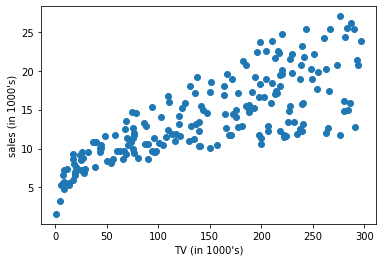

In [71]:
plt.scatter(advertising.TV, advertising.sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("sales (in 1000's)")

Text(0.5, 1.0, 'Simple Linear Regression')

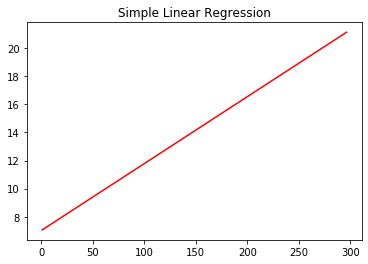

In [81]:
X=pd.DataFrame({'TV':[advertising.TV.min(),advertising.TV.max()]})
Y_pred=lm.predict(X)
plt.plot(X,Y_pred,c='red')
plt.title('Simple Linear Regression')

Text(0.5, 1.0, 'Simple Linear Regression')

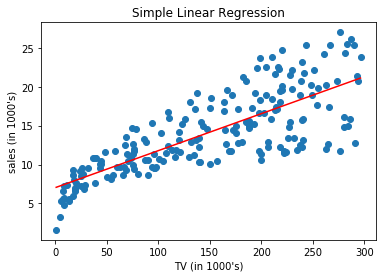

In [83]:
plt.scatter(advertising.TV, advertising.sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("sales (in 1000's)")
X=pd.DataFrame({'TV':[advertising.TV.min(),advertising.TV.max()]})
Y_pred=lm.predict(X)
plt.plot(X,Y_pred,c='red')
plt.title('Simple Linear Regression')

In [79]:
#seaborn 패키지 이용하기

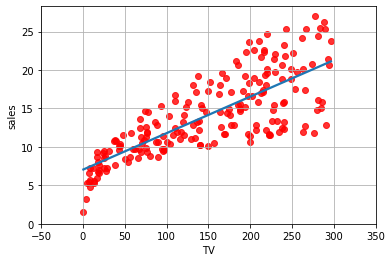

In [86]:
seaborn.regplot(advertising.TV,advertising.sales,order=1,ci=None,scatter_kws={'color':'r'})
plt.xlim(-50,350)
plt.ylim(ymin=0)
plt.grid()

In [87]:
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [93]:
str(advertising)

'        TV  radio  newspaper  sales\n0    230.1   37.8       69.2   22.1\n1     44.5   39.3       45.1   10.4\n2     17.2   45.9       69.3    9.3\n3    151.5   41.3       58.5   18.5\n4    180.8   10.8       58.4   12.9\n..     ...    ...        ...    ...\n195   38.2    3.7       13.8    7.6\n196   94.2    4.9        8.1    9.7\n197  177.0    9.3        6.4   12.8\n198  283.6   42.0       66.2   25.5\n199  232.1    8.6        8.7   13.4\n\n[200 rows x 4 columns]'

In [90]:
x_new=pd.DataFrame({'TV':[100]})

In [91]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TV      1 non-null      int64
dtypes: int64(1)
memory usage: 136.0 bytes


In [94]:
x_new.head()

,TV
0,100


In [96]:
lm.predict(x_new)

0    11.786258
dtype: float64

In [97]:
sales_manual=lm.params.Intercept+lm.params.TV*100

In [98]:
print('Manual Calculation : %6f'%sales_manual)

Manual Calculation : 11.786258


In [100]:
X_new=pd.DataFrame({'TV':[100,422,74]})

In [102]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TV      3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes


In [103]:
X_new

,TV
0,100
1,422
2,74


In [104]:
lm.predict(X_new)

0    11.786258
1    27.093056
2    10.550305
dtype: float64

In [105]:
##다중회귀\